In [17]:
import xarray as xr
import numpy as np
import functions
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [18]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/'
ds_piClim = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.dynamics.cam.concatfiles.nc')
ds_2xCO2 = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.dynamics.cam.concatfiles.nc')
ds_4xCO2 = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.dynamics.cam.concatfiles.nc')

In [19]:
# Fix time stamp
ds_piClim = functions.fix_cam_time(ds_piClim)
ds_2xCO2 = functions.fix_cam_time(ds_2xCO2)
ds_4xCO2 = functions.fix_cam_time(ds_4xCO2)

In [21]:
wpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/'
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
ds_name = ['piClim','abrupt-2xCO2','abrupt-4xCO2']

for ds, exp in zip(ds_list, ds_name):
    for var in ['U','V','OMEGA']:
        ds[var].to_netcdf(wpath+var+'_'+exp+'.nc')

In [24]:
ds_piClim['V']

<xarray.DataArray 'V' (time: 1800, lev: 32, lat: 96, lon: 144)> Size: 3GB
[796262400 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev      (lev) float64 256B 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * time     (time) object 14kB 1920-01-15 00:00:00 ... 2069-12-15 00:00:00
Attributes:
    mdims:         1
    units:         m/s
    long_name:     Meridional wind
    cell_methods:  time: mean

In regrid_to_pressure atf.function. Regridding OMEGA to pressure levels
In regrid_to_pressure atf.function. Regridding OMEGA to pressure levels


Text(0.5, 0, 'hPa/day')

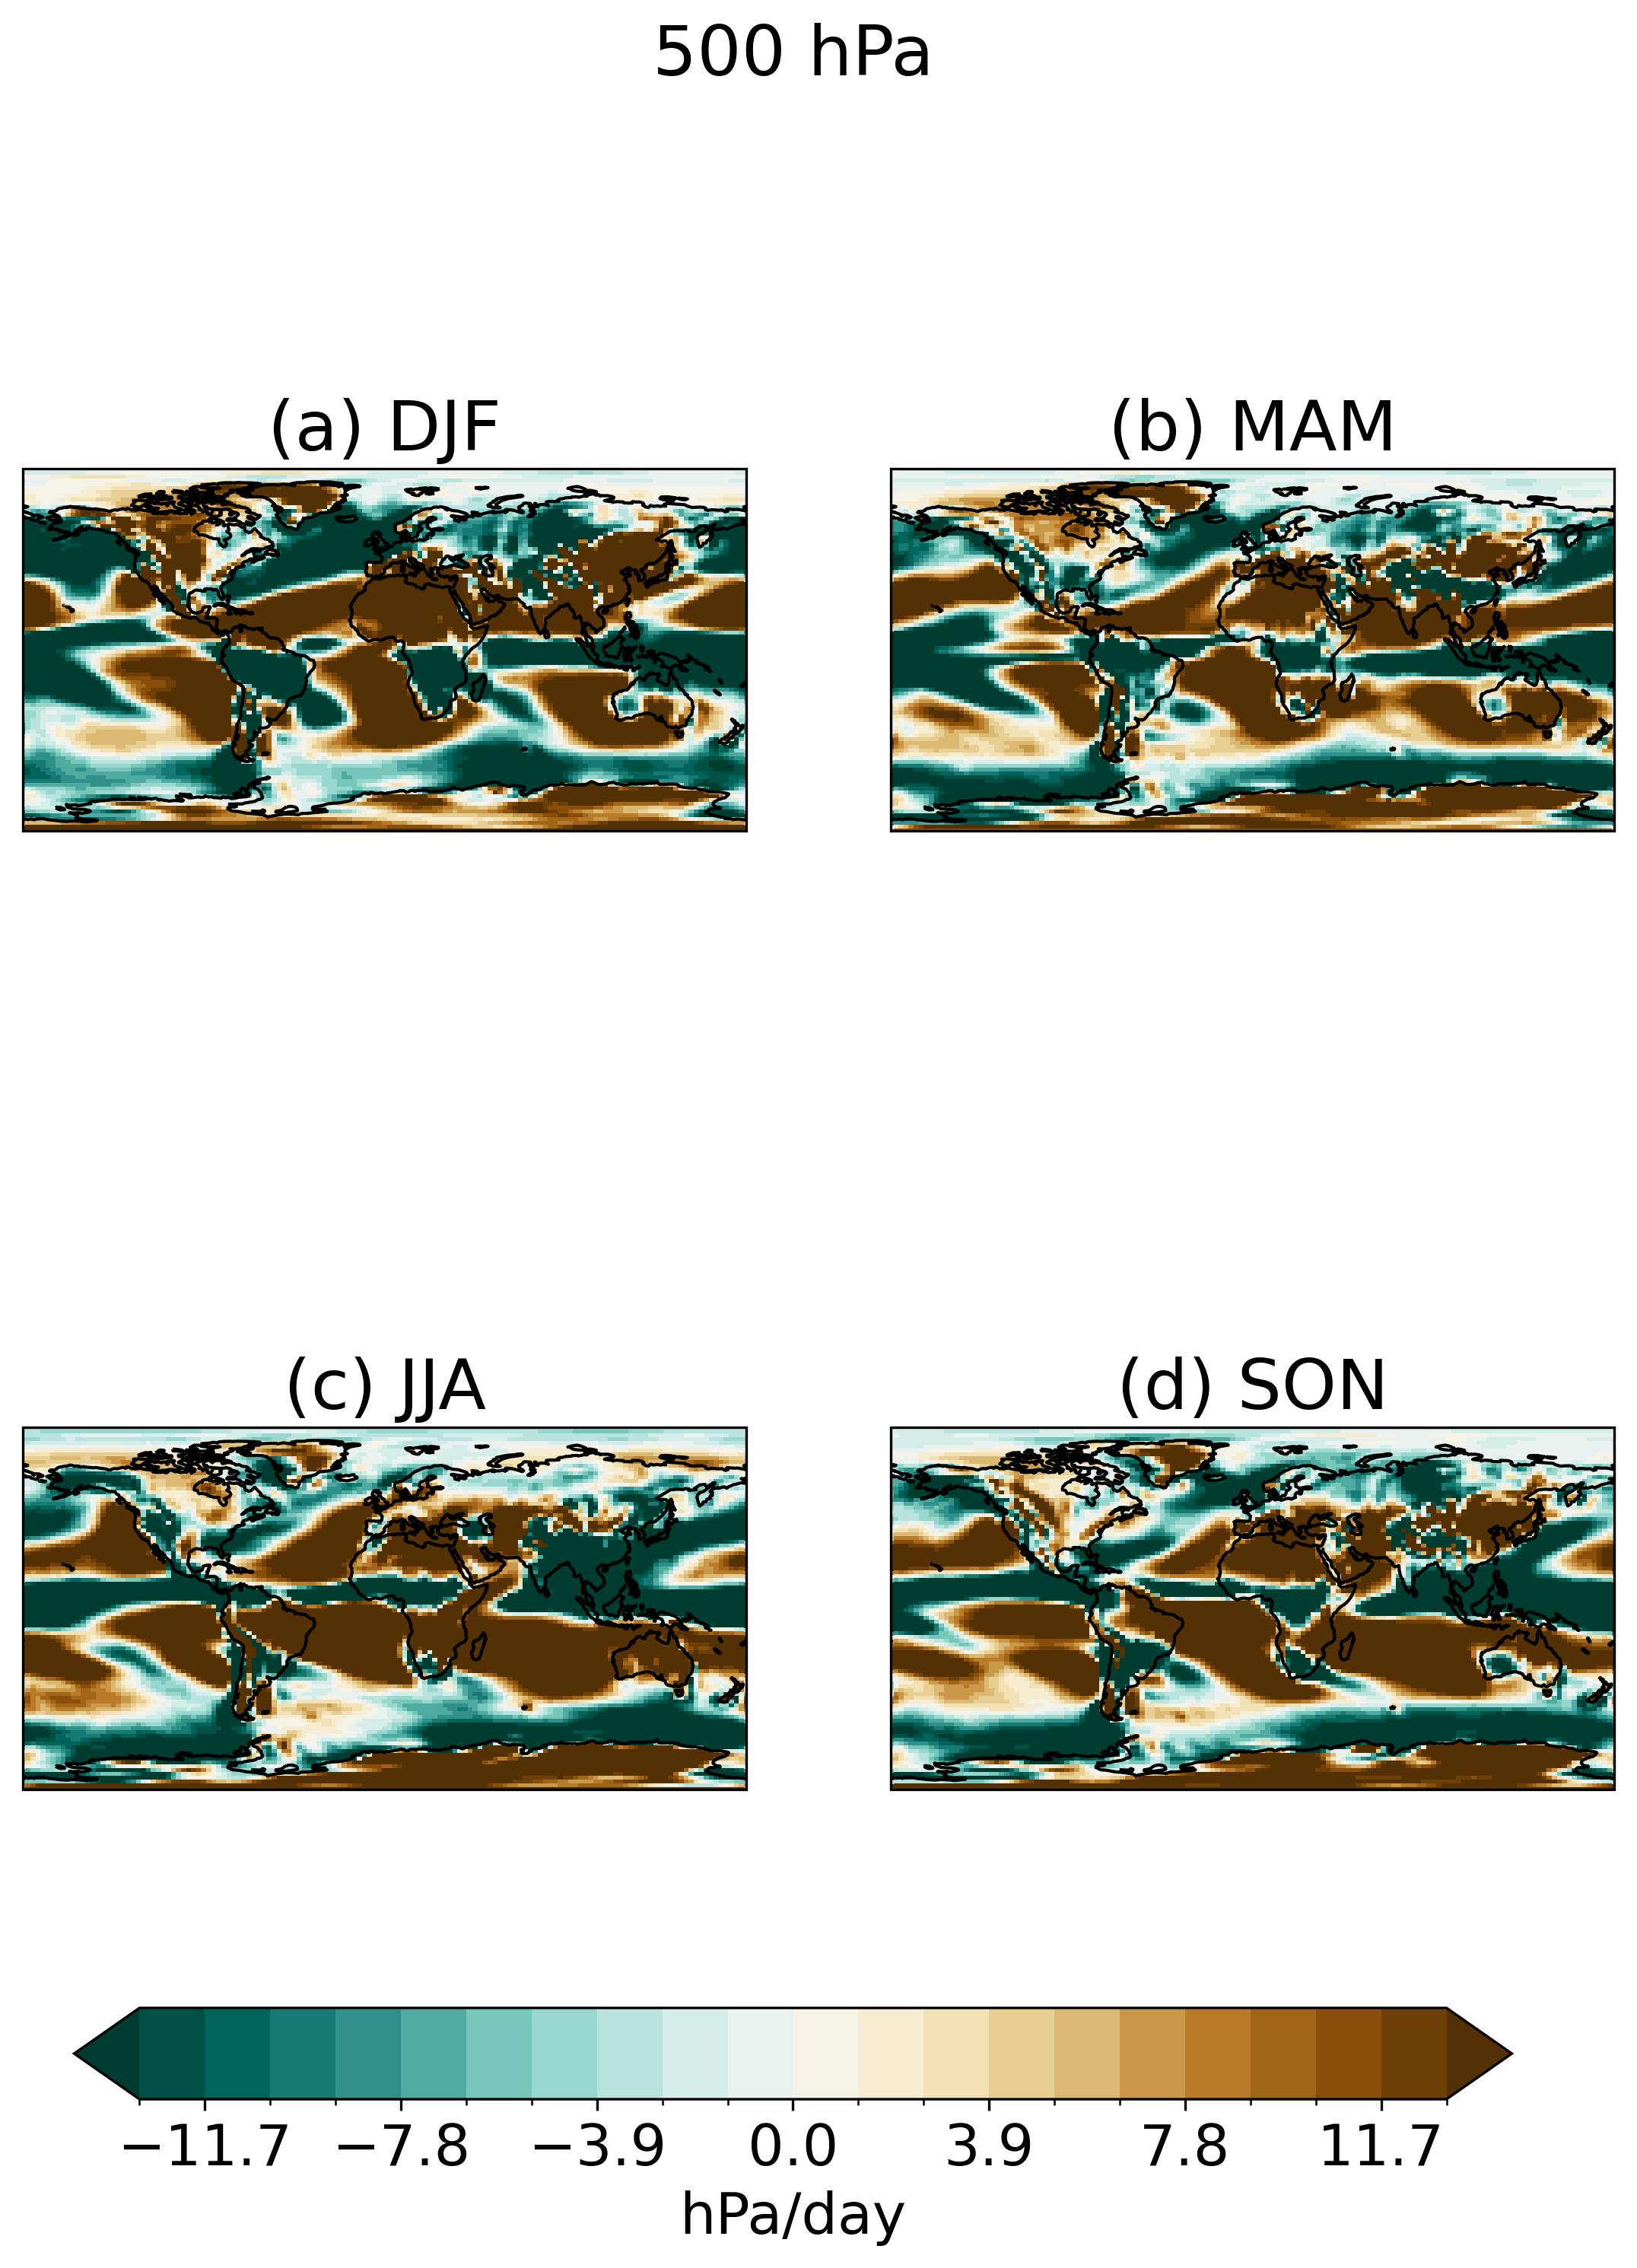

In [16]:
var = "OMEGA"
tslice = slice('2040-01-01', '2069-12-31')
ds_slice_piClim = ds_piClim.sel(time=tslice)
ds_slice_4xCO2 = ds_4xCO2.sel(time=tslice)

regridded_piClim = functions.regrid_to_pressure(ds_slice_piClim,var)
regridded_4xCO2 = functions.regrid_to_pressure(ds_slice_4xCO2,var)

plev = 500
lim = 13
levels = np.linspace(-lim, lim, 21)
#levels = 21
unit = 'hPa/day'

regridded_piClim_height = regridded_piClim.sel(plev=plev, method='nearest')
regridded_4xCO2_height = regridded_4xCO2.sel(plev=plev, method='nearest')
regridded_piClim_height = regridded_piClim_height.groupby(regridded_piClim_height.time.dt.season).mean('time')
regridded_4xCO2_height = regridded_4xCO2_height.groupby(regridded_4xCO2_height.time.dt.season).mean('time')

fig = plt.figure(1, figsize=[9,10],dpi=300)
fig.suptitle(str(plev)+' hPa', fontsize=22)

# Set the projection to use for plotting
#ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
#ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
#ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
#ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))

ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())

#plt.subplots_adjust(top=0.85)

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):

    #functions.polarCentral_set_latlim([40,90], ax)
    data = regridded_4xCO2_height[var].sel(season=season)# - regridded_piClim_height[var].sel(season=season)
    data = data*60*60*24/100
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG_r', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel(unit, fontsize=18)


Text(0.5, 0, 'm')

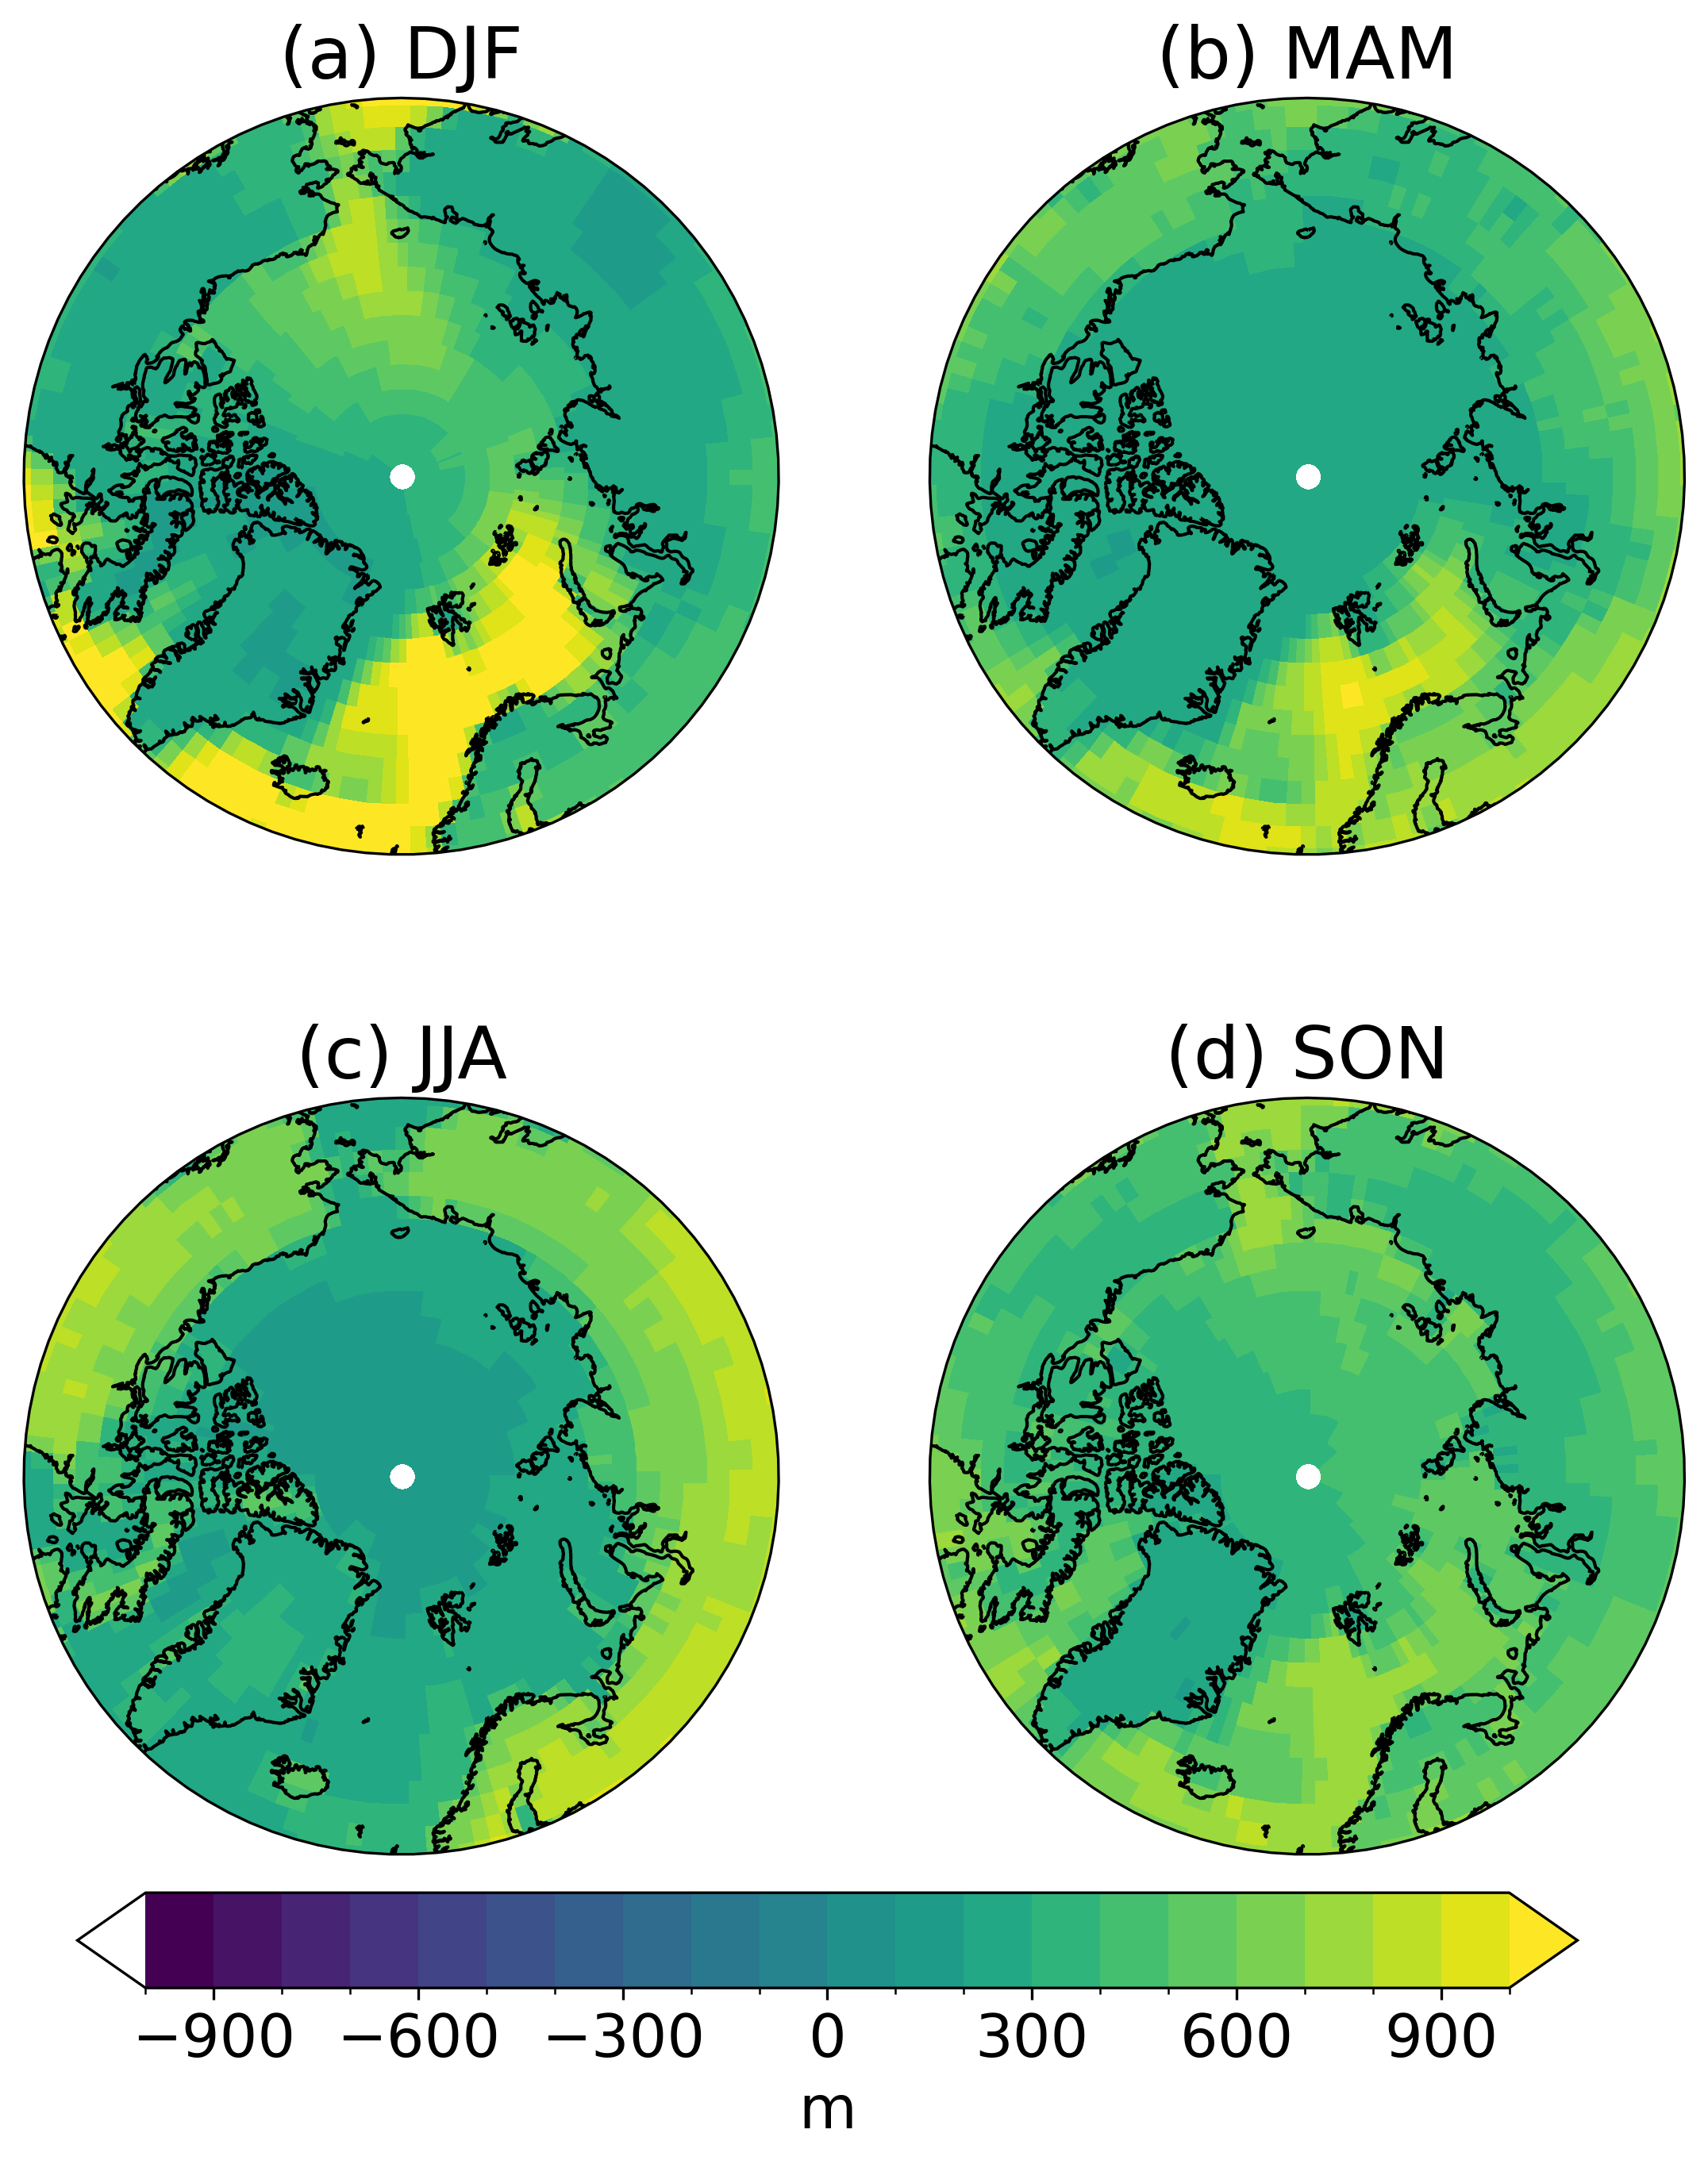

In [10]:
var = "PBLH"
tslice = slice('2040-01-01', '2069-12-31')
ds_slice_piClim = ds_piClim.sel(time=tslice)
ds_slice_4xCO2 = ds_4xCO2.sel(time=tslice)
lim = 1000
levels = np.linspace(-lim, lim, 21)
unit = 'm'

ds_piClim_season = ds_slice_piClim.groupby(ds_slice_piClim.time.dt.season).mean('time')
ds_4xCO2_season = ds_slice_4xCO2.groupby(ds_slice_4xCO2.time.dt.season).mean('time')

fig = plt.figure(1, figsize=[9,10],dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):

    functions.polarCentral_set_latlim([60,90], ax)
    data = ds_4xCO2_season[var].sel(season=season)# - ds_piClim_season[var].sel(season=season)
    #data = ds_piClim_season[var].sel(season=season)# - ds_piClim_season[var].sel(season=season)
    data = data
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='viridis', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel(unit, fontsize=18)


In [5]:
tslice = slice('2040-01-01', '2069-12-31')
ds_slice_piClim = ds_piClim.sel(time=tslice)
ds_slice_4xCO2 = ds_4xCO2.sel(time=tslice)

var = "U"
U_regridded_piClim = functions.regrid_to_pressure(ds_slice_piClim,var)
U_regridded_4xCO2 = functions.regrid_to_pressure(ds_slice_4xCO2,var)

var = "V"
V_regridded_piClim = functions.regrid_to_pressure(ds_slice_piClim,var)
V_regridded_4xCO2 = functions.regrid_to_pressure(ds_slice_4xCO2,var)

U_regridded_piClim_season = U_regridded_piClim.groupby(U_regridded_piClim.time.dt.season).mean('time')
U_regridded_4xCO2_season = U_regridded_4xCO2.groupby(U_regridded_4xCO2.time.dt.season).mean('time')

V_regridded_piClim_season = V_regridded_piClim.groupby(V_regridded_piClim.time.dt.season).mean('time')
V_regridded_4xCO2_season = V_regridded_4xCO2.groupby(V_regridded_4xCO2.time.dt.season).mean('time')

U_regridded_piClim_monthly = U_regridded_piClim.groupby(U_regridded_piClim.time.dt.month).mean('time')
U_regridded_4xCO2_monthly = U_regridded_4xCO2.groupby(U_regridded_4xCO2.time.dt.month).mean('time')

V_regridded_piClim_monthly = V_regridded_piClim.groupby(V_regridded_piClim.time.dt.month).mean('time')
V_regridded_4xCO2_monthly = V_regridded_4xCO2.groupby(V_regridded_4xCO2.time.dt.month).mean('time')



In regrid_to_pressure atf.function. Regridding U to pressure levels
In regrid_to_pressure atf.function. Regridding U to pressure levels
In regrid_to_pressure atf.function. Regridding V to pressure levels
In regrid_to_pressure atf.function. Regridding V to pressure levels


Text(0.5, 0, 'm/s')

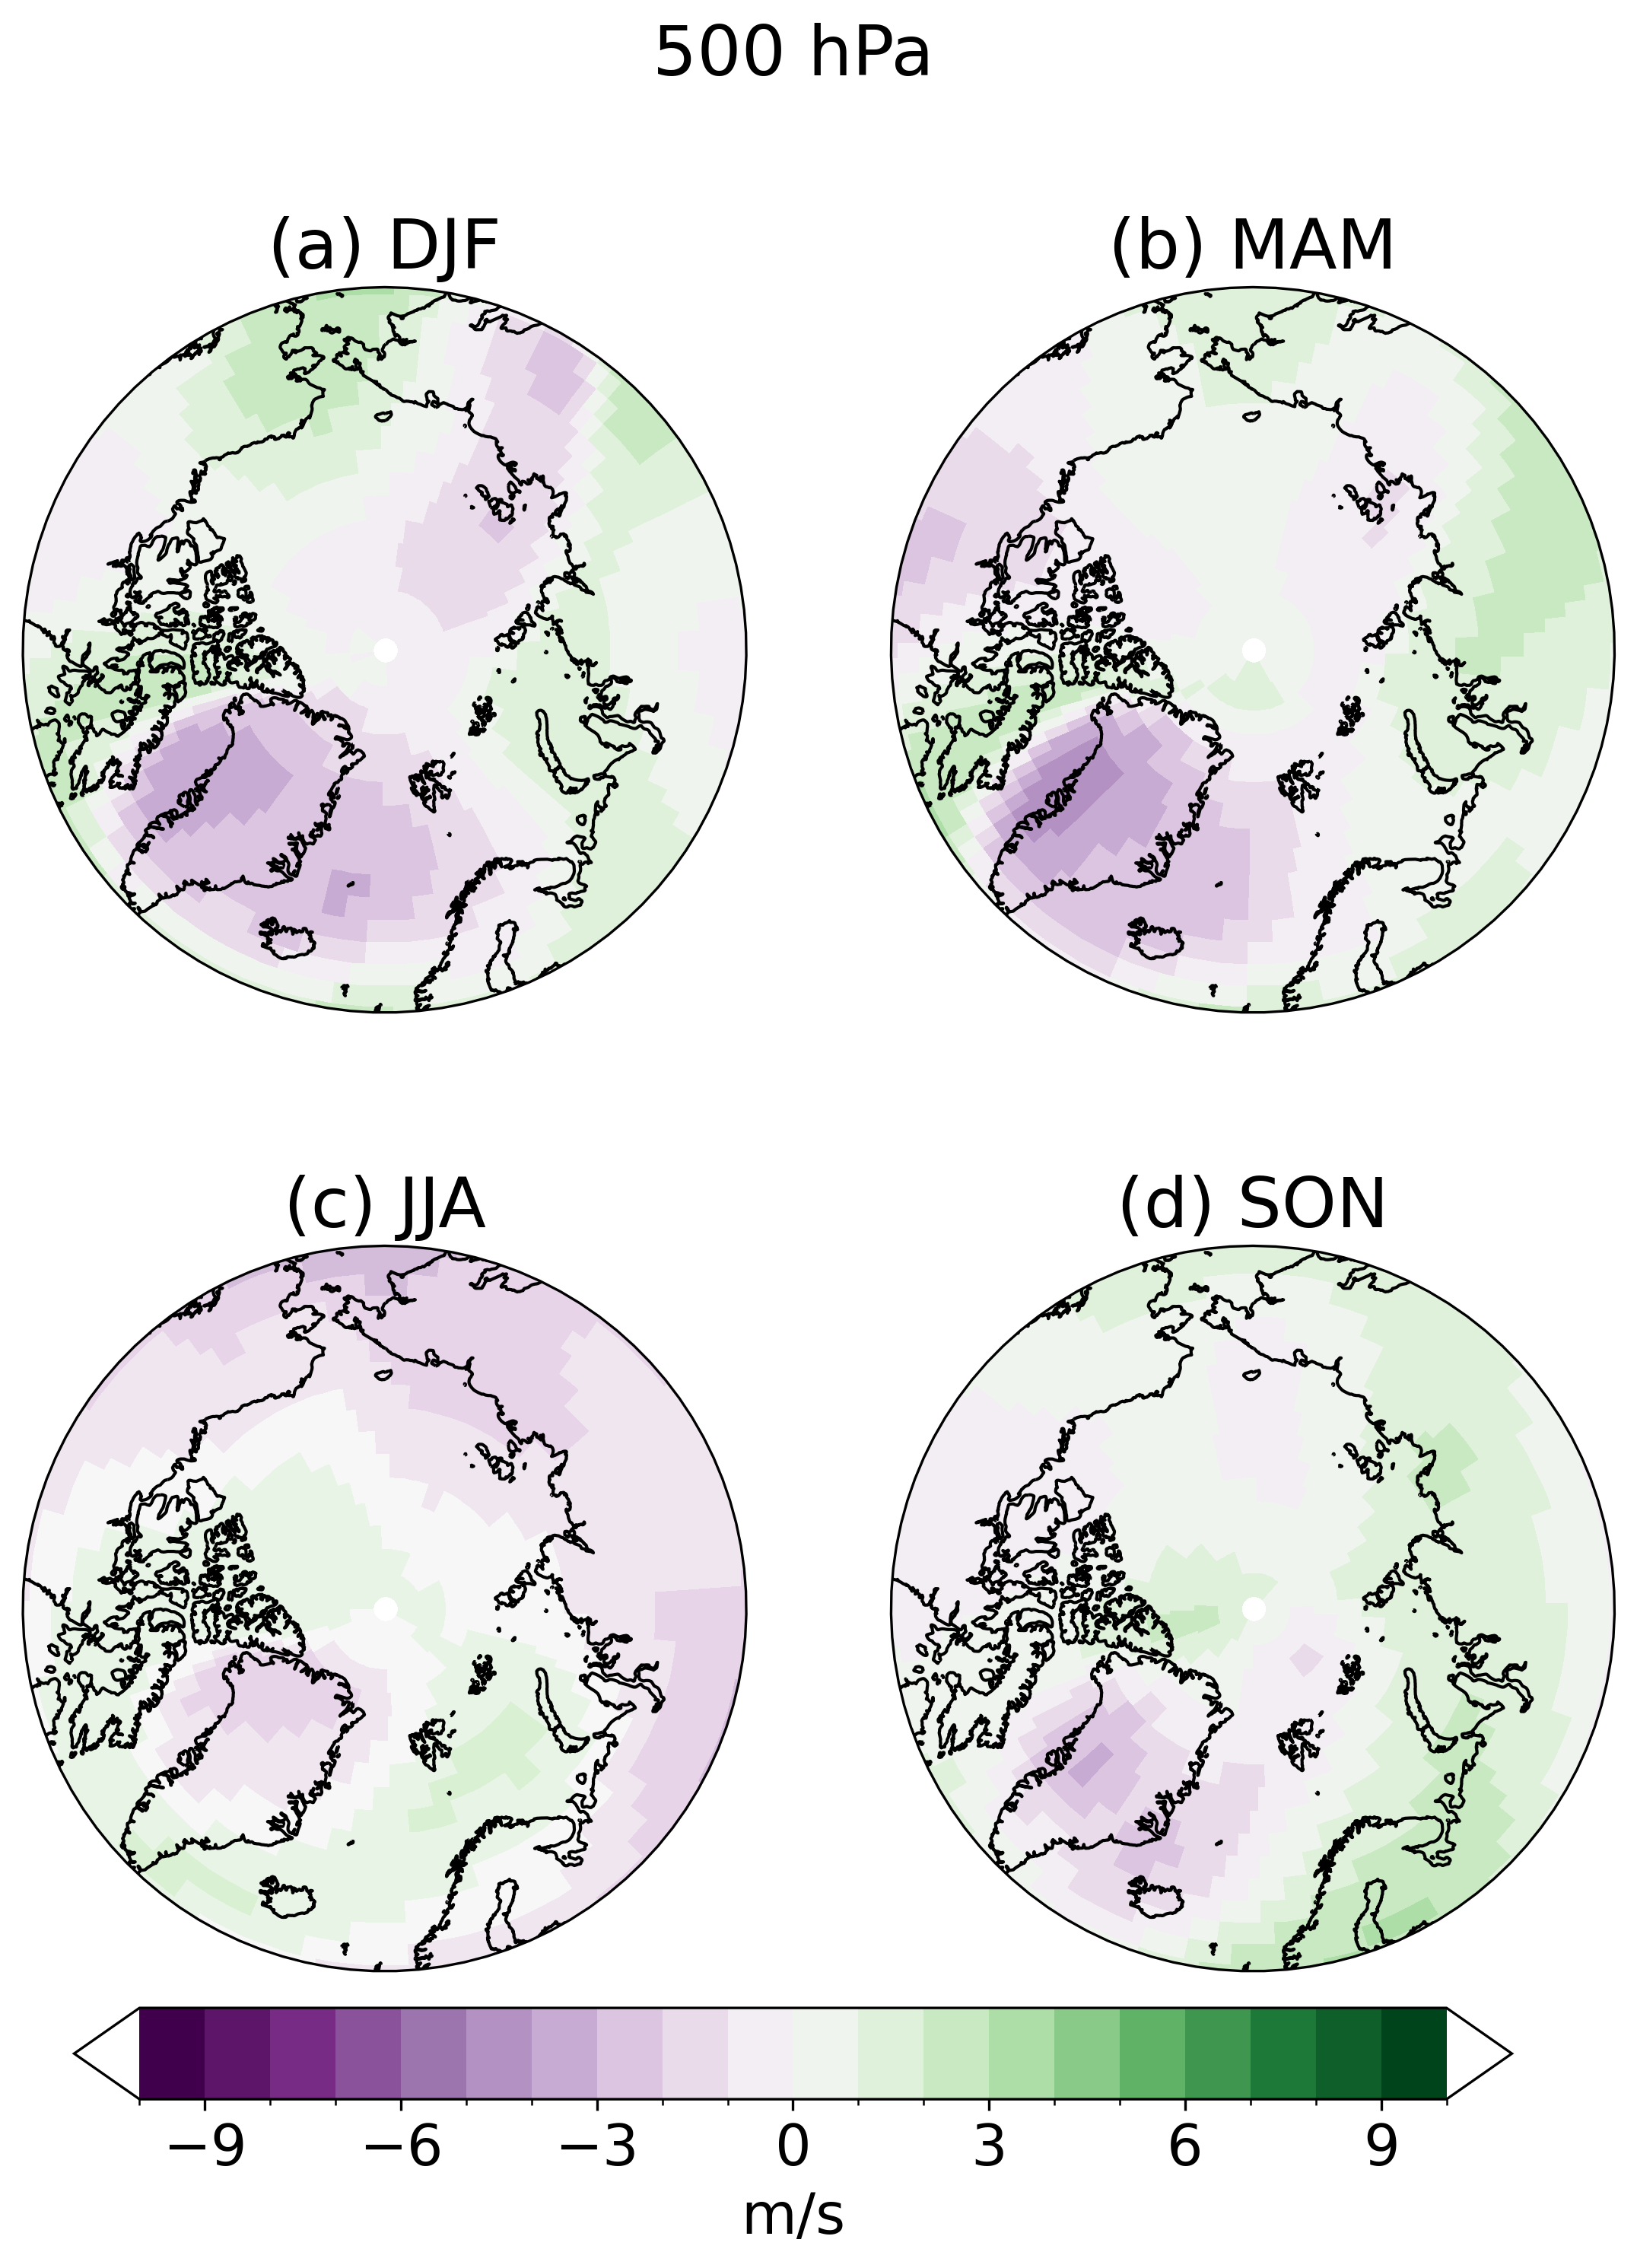

In [7]:
plev = 500
lim = 10
levels = np.linspace(-lim, lim, 21)
unit = 'm/s'

U_piClim_season = U_regridded_piClim_season.sel(plev=plev, method='nearest')
V_piClim_season = V_regridded_piClim_season.sel(plev=plev, method='nearest')
U_4xCO2_season = U_regridded_4xCO2_season.sel(plev=plev, method='nearest')
V_4xCO2_season = V_regridded_4xCO2_season.sel(plev=plev, method='nearest')
U_piClim_season['wind_speed'] = np.sqrt(U_piClim_season["U"]**2 + V_piClim_season["V"]**2)
U_4xCO2_season['wind_speed'] = np.sqrt(U_4xCO2_season["U"]**2 + V_4xCO2_season["V"]**2)

fig = plt.figure(1, figsize=[9,10],dpi=300)
fig.suptitle(str(plev)+' hPa', fontsize=22)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):

    functions.polarCentral_set_latlim([60,90], ax)
    data = U_4xCO2_season['wind_speed'].sel(season=season) - U_piClim_season['wind_speed'].sel(season=season) 
    data = data
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='PRGn', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel(unit, fontsize=18)

Text(0.5, 0, 'm/s')

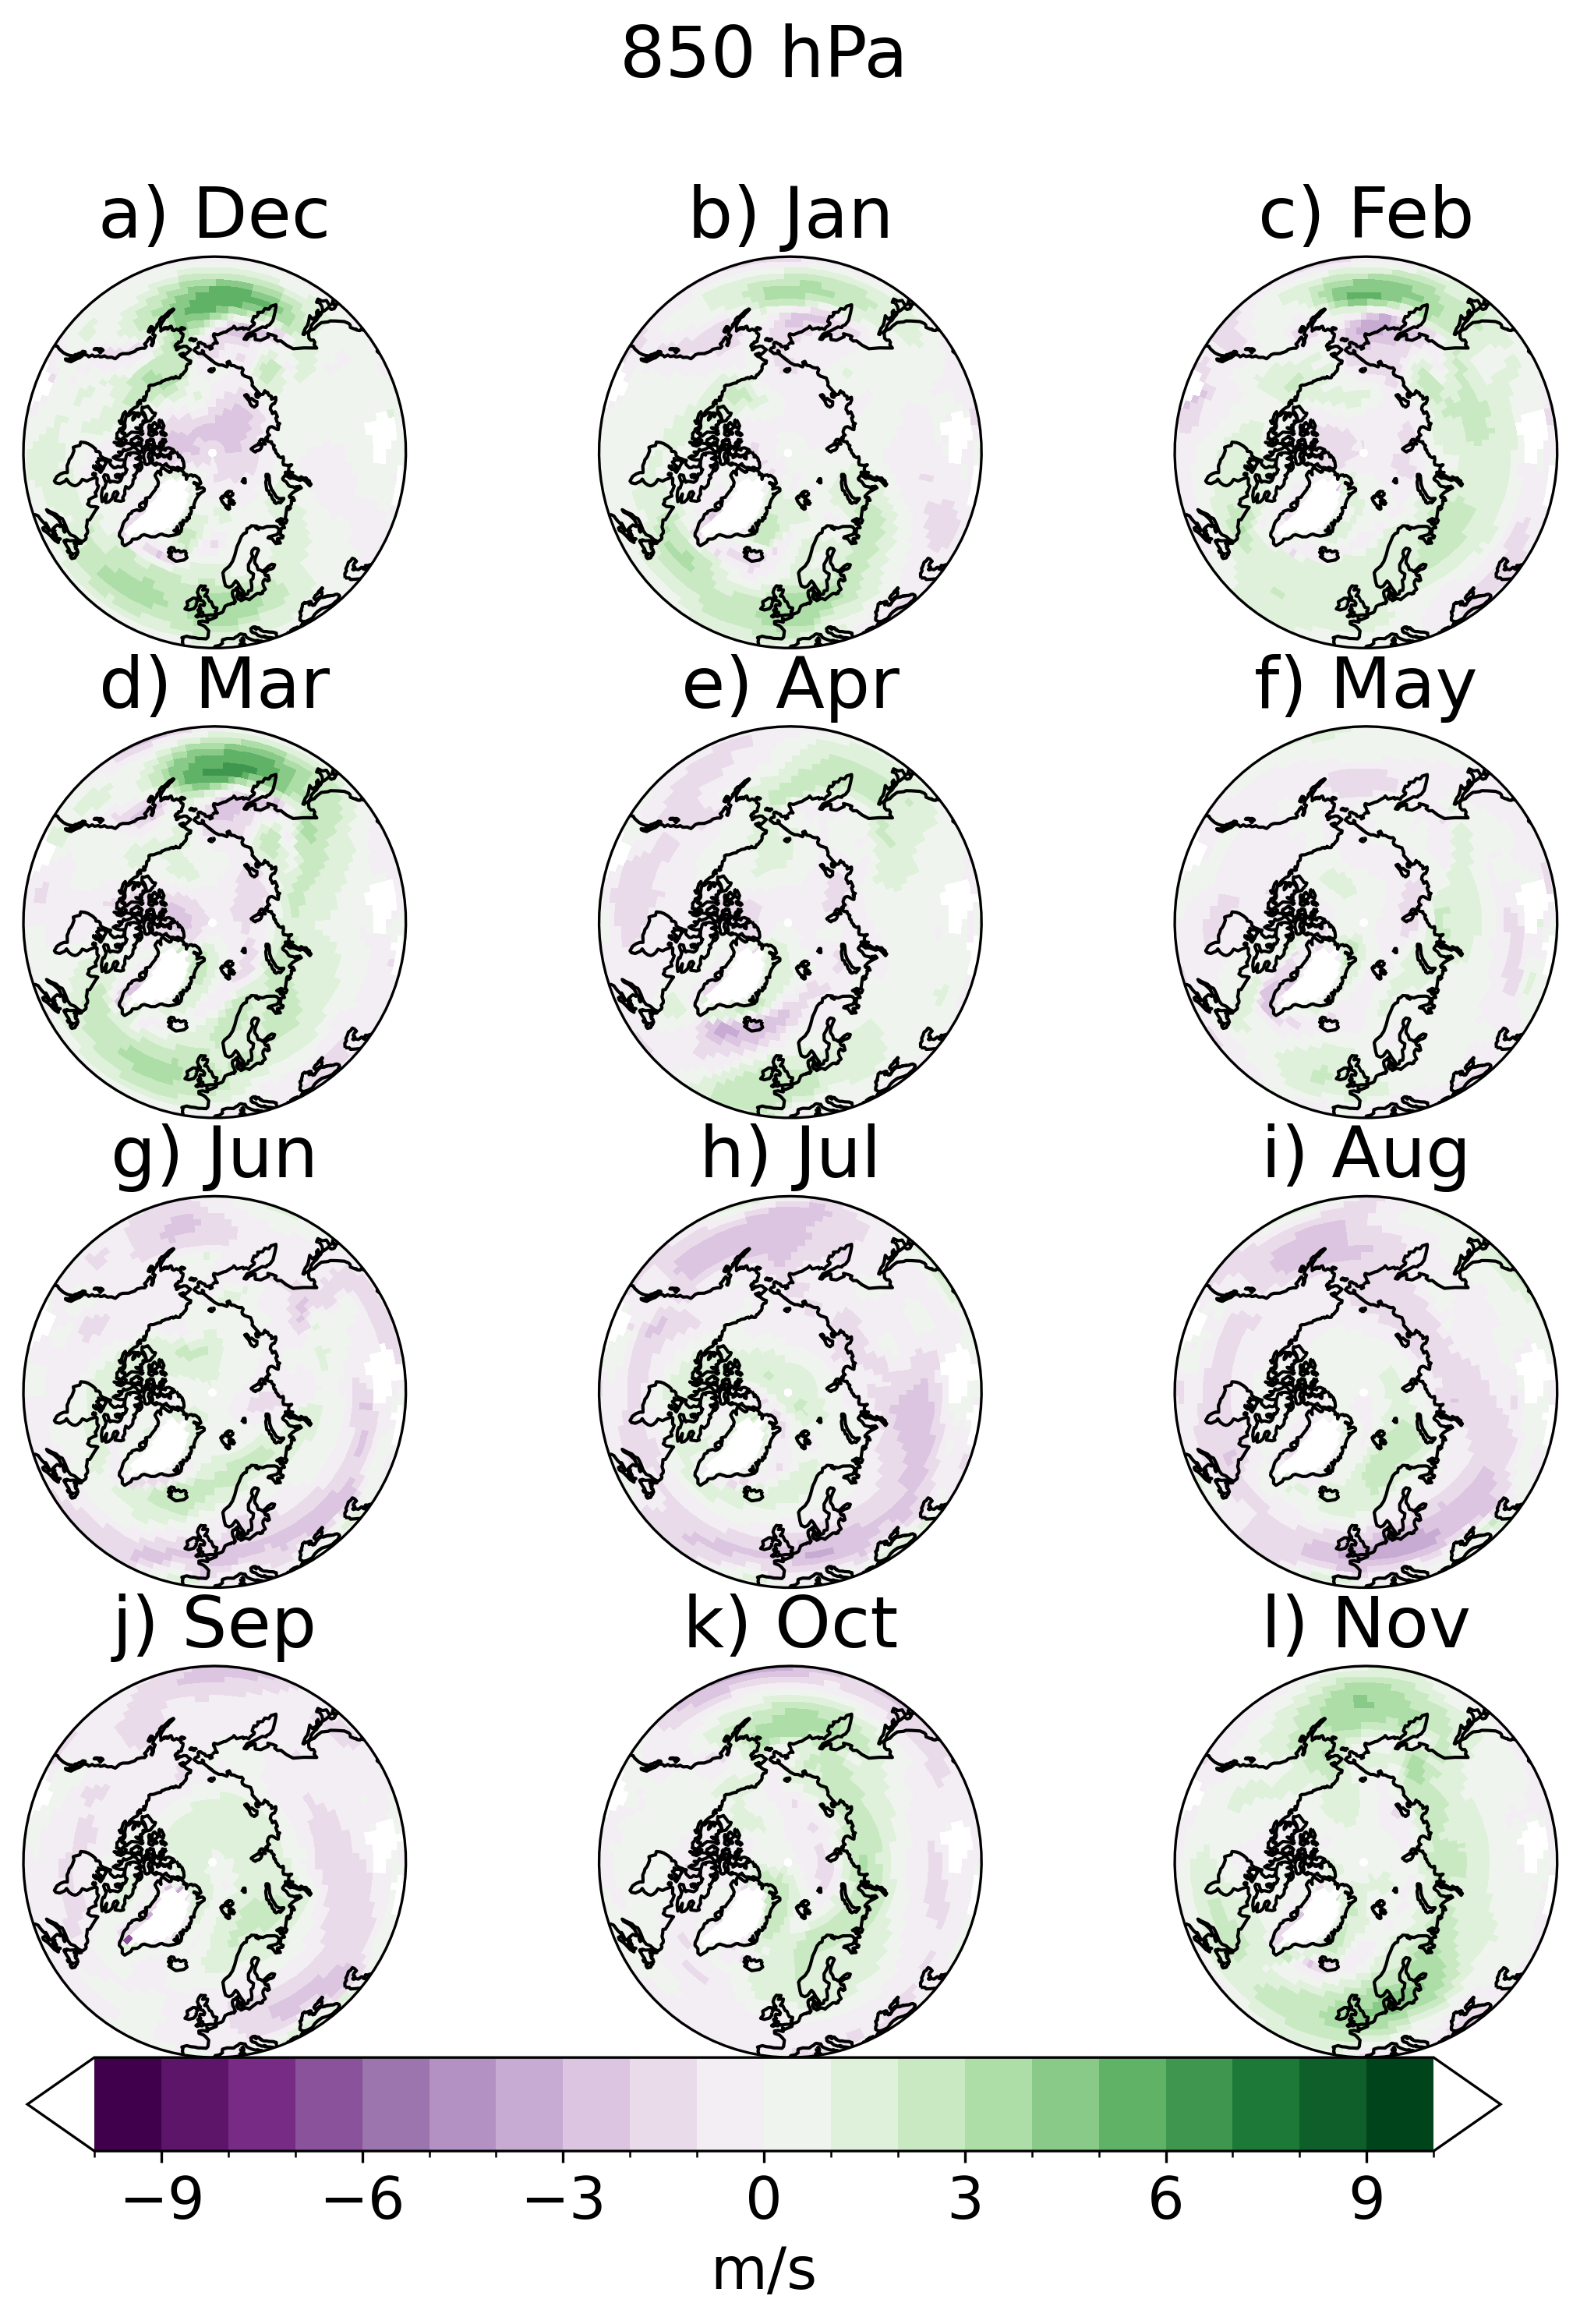

In [18]:
plev = 850
lim = 10
levels = np.linspace(-lim, lim, 21)
unit = 'm/s'

U_piClim_m = U_regridded_piClim_monthly.sel(plev=plev, method='nearest')
V_piClim_m = V_regridded_piClim_monthly.sel(plev=plev, method='nearest')
U_4xCO2_m = U_regridded_4xCO2_monthly.sel(plev=plev, method='nearest')
V_4xCO2_m = V_regridded_4xCO2_monthly.sel(plev=plev, method='nearest')
U_piClim_m['wind_speed'] = np.sqrt(U_piClim_m["U"]**2 + V_piClim_m["V"]**2)
U_4xCO2_m['wind_speed'] = np.sqrt(U_4xCO2_m["U"]**2 + V_4xCO2_m["V"]**2)

# Set the projection to use for plotting
fig,axs = plt.subplots(nrows=4, ncols=3, figsize=[9,10],dpi=300,  subplot_kw={'projection':ccrs.Orthographic(0, 90)})
fig.suptitle(str(plev)+' hPa', fontsize=22)

months = [[12, 1, 2], 
        [3, 4, 5], 
        [6, 7, 8], 
        [9, 10, 11]]

month_names = [['Dec', 'Jan', 'Feb'], 
        ['Mar', 'Apr', 'May'], 
        ['Jun', 'Jul', 'Aug'], 
        ['Sep', 'Oct', 'Nov']]

labels = [['a)', 'b)', 'c)'], 
        ['d)', 'e)', 'f)'], 
        ['g)', 'h)', 'i)'], 
        ['j)', 'k)', 'l)']]

for row in range(4):
    for col in range(3):
        ax = axs[row][col]
        month = months[row][col]

        functions.polarCentral_set_latlim([40,90], ax)
        data = U_4xCO2_m['wind_speed'].sel(month=month) - U_piClim_m['wind_speed'].sel(month=month) 
        map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='PRGn', levels=levels,
                                        add_colorbar=False)
        ax.set_title(labels[row][col]+' '+month_names[row][col], fontsize=22)   
        ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel(unit, fontsize=18)

Text(0.5, 0, 'm/s')

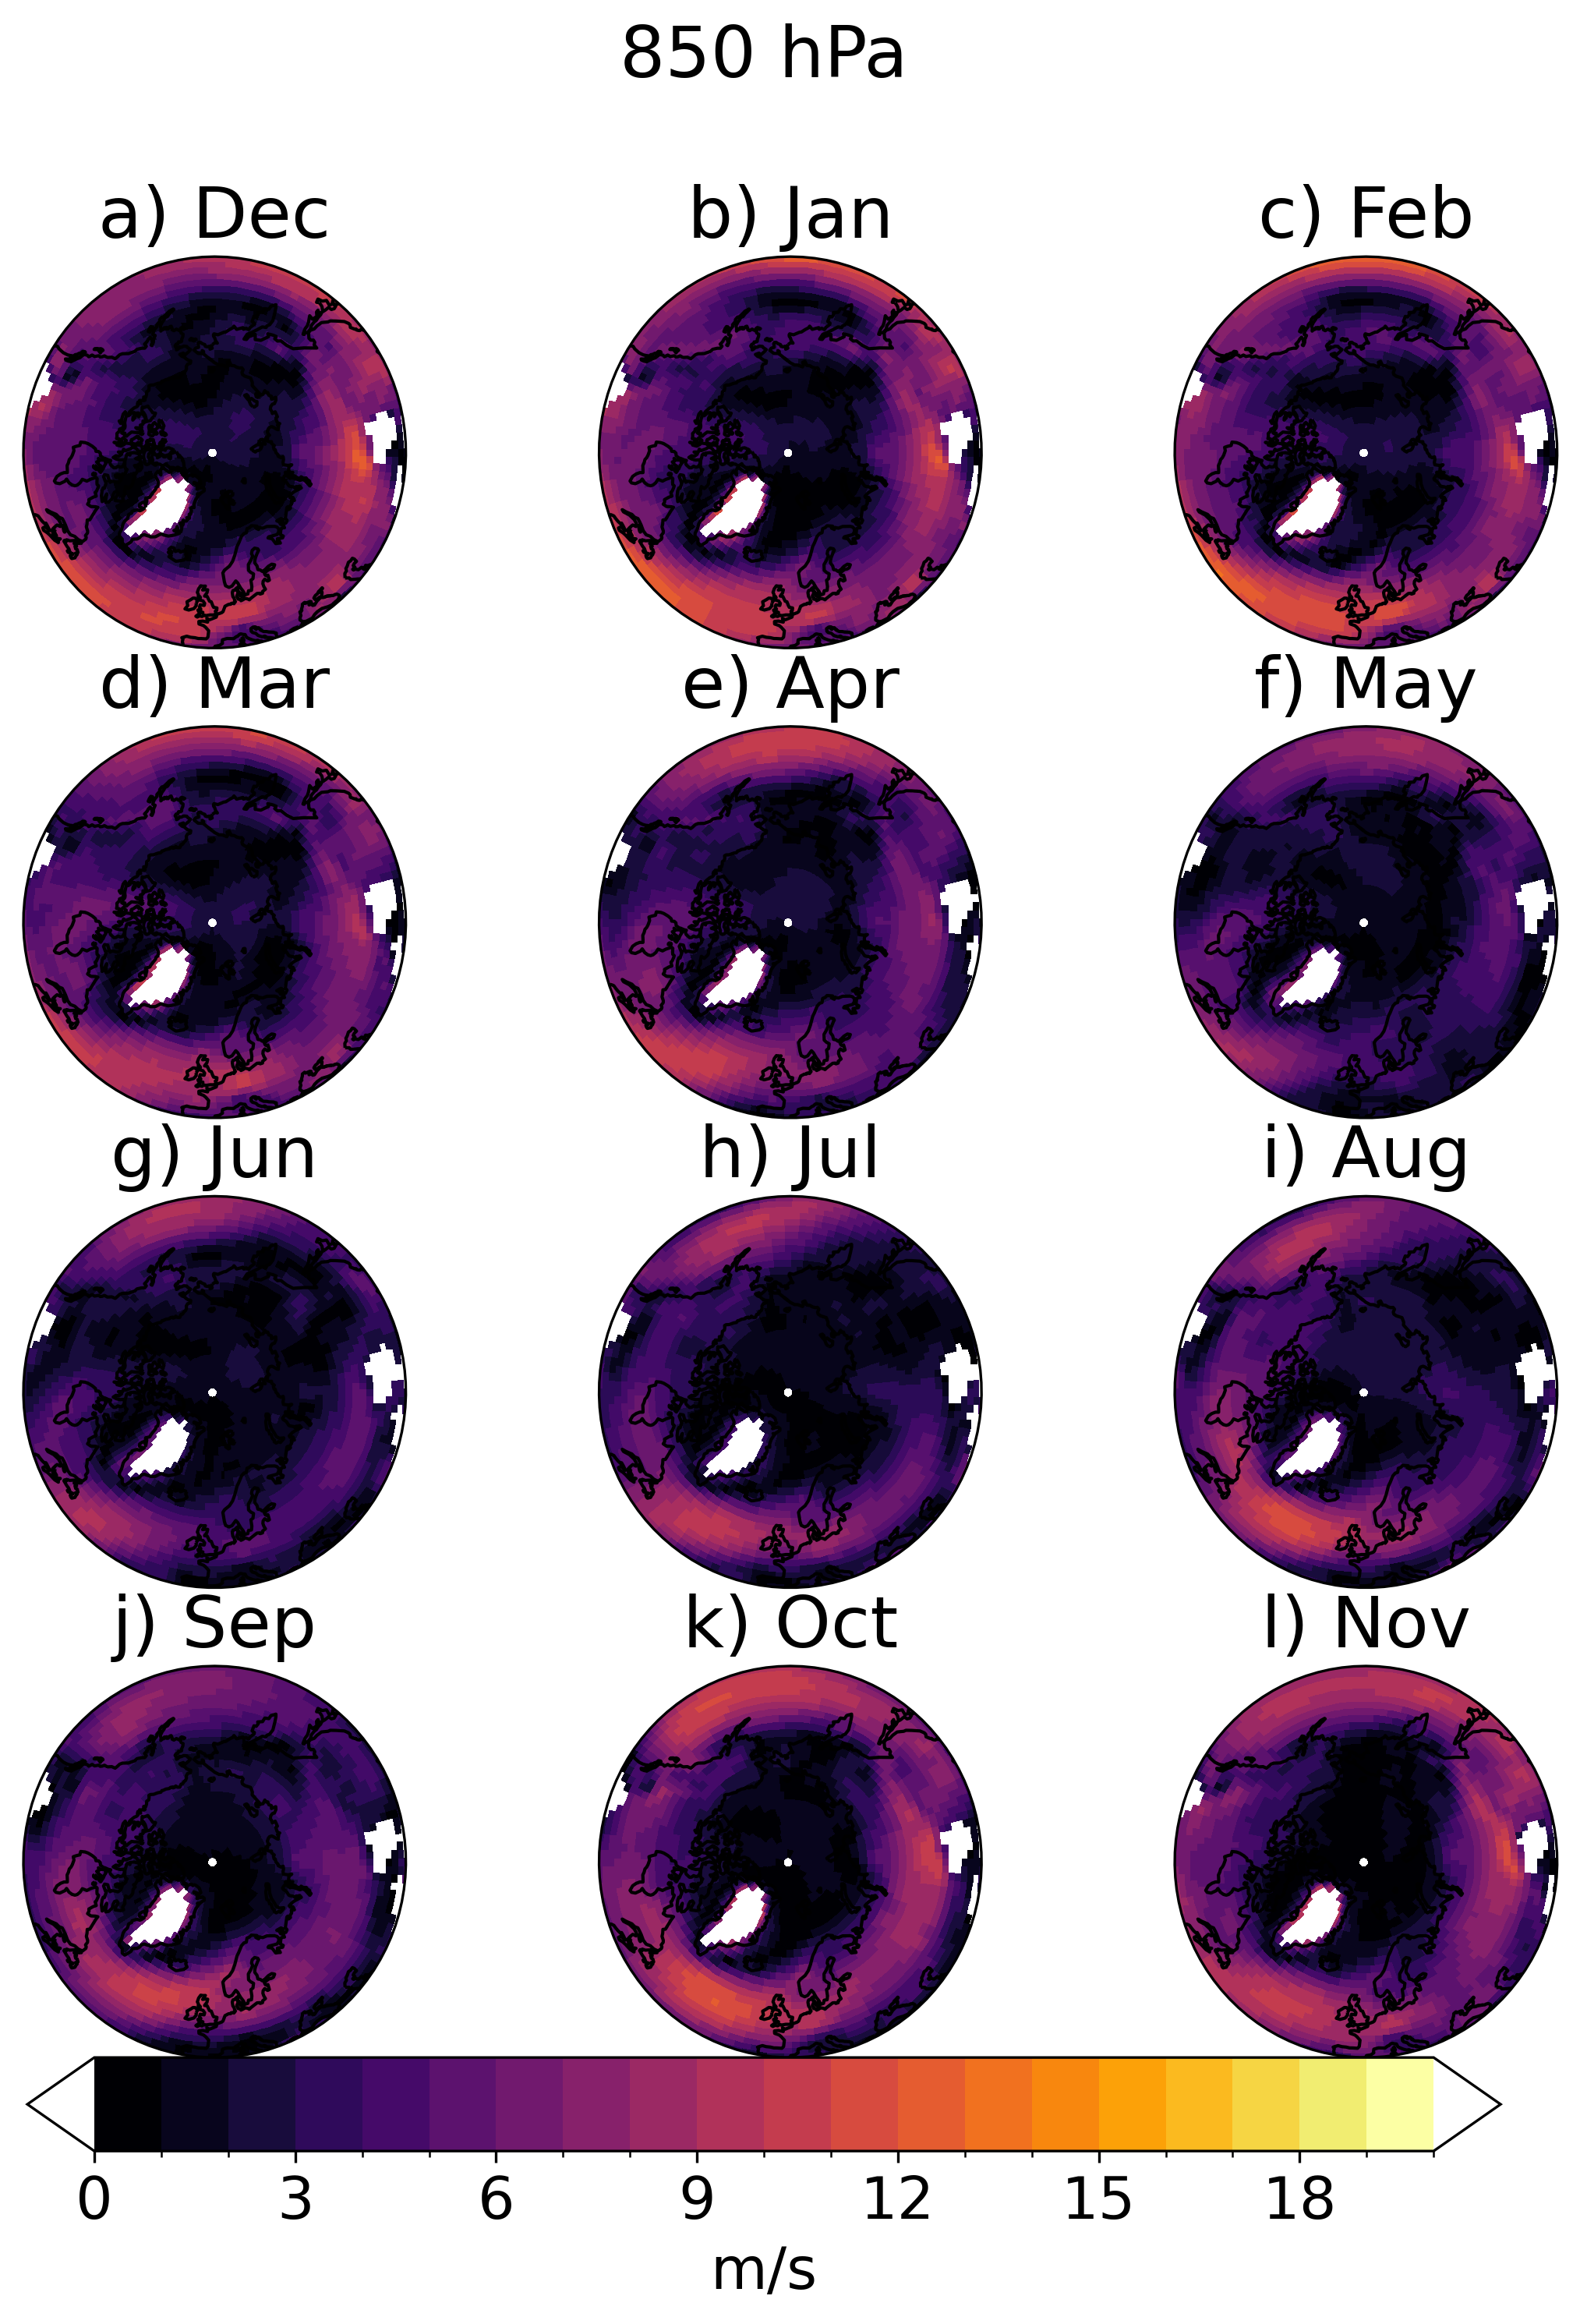

In [17]:
plev = 850
lim = 20
levels = np.linspace(0, lim, 21)
unit = 'm/s'

U_piClim_m = U_regridded_piClim_monthly.sel(plev=plev, method='nearest')
V_piClim_m = V_regridded_piClim_monthly.sel(plev=plev, method='nearest')
U_4xCO2_m = U_regridded_4xCO2_monthly.sel(plev=plev, method='nearest')
V_4xCO2_m = V_regridded_4xCO2_monthly.sel(plev=plev, method='nearest')
U_piClim_m['wind_speed'] = np.sqrt(U_piClim_m["U"]**2 + V_piClim_m["V"]**2)
U_4xCO2_m['wind_speed'] = np.sqrt(U_4xCO2_m["U"]**2 + V_4xCO2_m["V"]**2)

# Set the projection to use for plotting
fig,axs = plt.subplots(nrows=4, ncols=3, figsize=[9,10],dpi=300,  subplot_kw={'projection':ccrs.Orthographic(0, 90)})
fig.suptitle(str(plev)+' hPa', fontsize=22)

months = [[12, 1, 2], 
        [3, 4, 5], 
        [6, 7, 8], 
        [9, 10, 11]]

month_names = [['Dec', 'Jan', 'Feb'], 
        ['Mar', 'Apr', 'May'], 
        ['Jun', 'Jul', 'Aug'], 
        ['Sep', 'Oct', 'Nov']]

labels = [['a)', 'b)', 'c)'], 
        ['d)', 'e)', 'f)'], 
        ['g)', 'h)', 'i)'], 
        ['j)', 'k)', 'l)']]

for row in range(4):
    for col in range(3):
        ax = axs[row][col]
        month = months[row][col]

        functions.polarCentral_set_latlim([40,90], ax)
        data = U_piClim_m['wind_speed'].sel(month=month)
        map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='inferno', levels=levels,
                                        add_colorbar=False)
        ax.set_title(labels[row][col]+' '+month_names[row][col], fontsize=22)   
        ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel(unit, fontsize=18)

Text(0.5, 0, 'm/s')

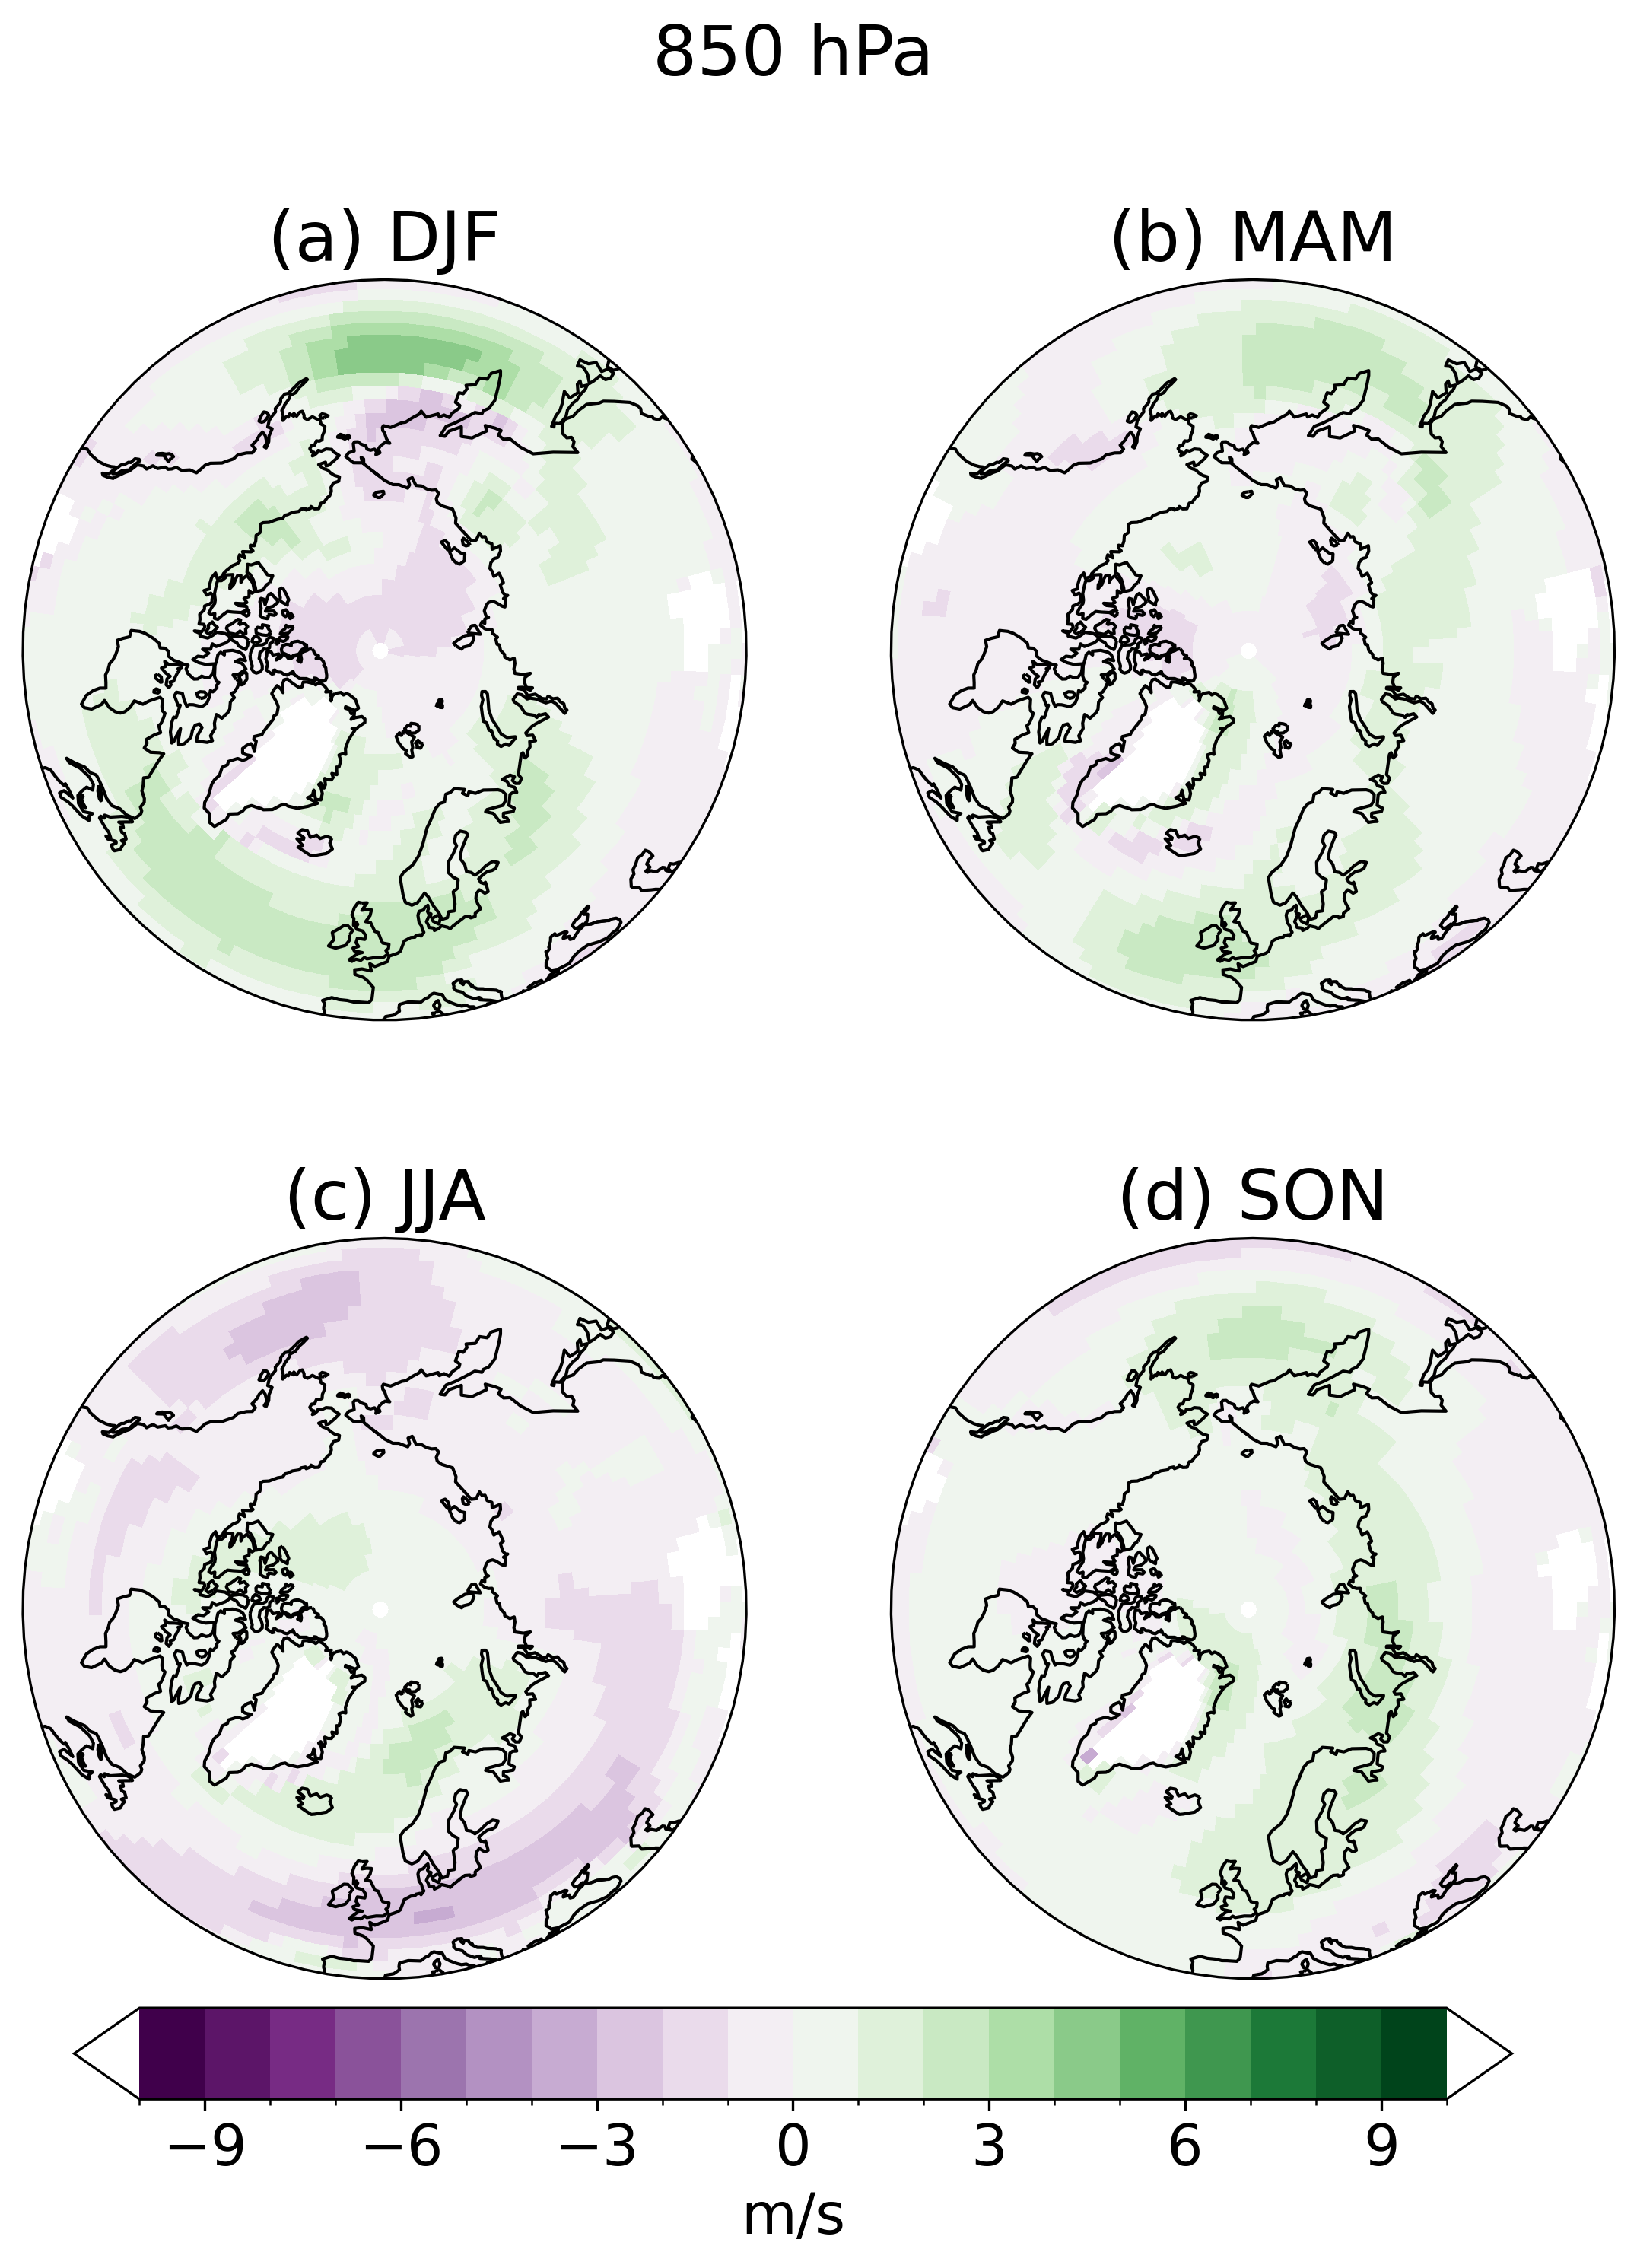

In [10]:
plev = 850
lim = 10
levels = np.linspace(-lim, lim, 21)
unit = 'm/s'

U_piClim_season = U_regridded_piClim_season.sel(plev=plev, method='nearest')
V_piClim_season = V_regridded_piClim_season.sel(plev=plev, method='nearest')
U_4xCO2_season = U_regridded_4xCO2_season.sel(plev=plev, method='nearest')
V_4xCO2_season = V_regridded_4xCO2_season.sel(plev=plev, method='nearest')
U_piClim_season['wind_speed'] = np.sqrt(U_piClim_season["U"]**2 + V_piClim_season["V"]**2)
U_4xCO2_season['wind_speed'] = np.sqrt(U_4xCO2_season["U"]**2 + V_4xCO2_season["V"]**2)

fig = plt.figure(1, figsize=[9,10],dpi=300)
fig.suptitle(str(plev)+' hPa', fontsize=22)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):

    functions.polarCentral_set_latlim([40,90], ax)
    data = U_4xCO2_season['wind_speed'].sel(season=season) - U_piClim_season['wind_speed'].sel(season=season) 
    data = data
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='PRGn', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel(unit, fontsize=18)